In [2]:
%load_ext autoreload
%autoreload 2

import rdkit
rdkit.Chem.Draw.IPythonConsole.ipython_maxProperties = -1

import dgym as dg

# load all data
print('load data')
path = '../../dgym-data'

deck = dg.MoleculeCollection.from_sdf(
    f'{path}/DSi-Poised_Library_annotated.sdf',
    reactant_names=['reagsmi1', 'reagsmi2', 'reagsmi3']
)

load data


In [238]:
from meeko import MoleculePreparation
from meeko import PDBQTWriterLegacy

def get_pdbqt(mol):

    # add hydrogens (without regard to pH)
    protonated_mol = rdkit.Chem.AddHs(mol)

    # generate 3D coordinates for the ligand. 
    rdkit.Chem.AllChem.EmbedMolecule(protonated_mol)

    # intialize preparation
    preparator = MoleculePreparation()
    mol_setups = preparator.prepare(protonated_mol)
    
    for setup in mol_setups:
        pdbqt_string, is_ok, error_msg = PDBQTWriterLegacy.write_string(setup)
        if is_ok:
            return pdbqt_string

Create ligand PDBQTs.

In [239]:
import os
from tqdm.notebook import tqdm

out_dir = '../../dgym-data/out/ligands_temp/'

pdbqts = []
for mol in tqdm(deck[:96]):
    full_path = os.path.join(out_dir, f'{mol.name}.pdbqt')
    pdbqt = get_pdbqt(mol.mol)
    pdbqts.append(pdbqt)
    with open(full_path, 'w') as file:
        file.write(pdbqt)

  0%|          | 0/96 [00:00<?, ?it/s]

In [240]:
# add hydrogens (without regard to pH)
protonated_mol = rdkit.Chem.AddHs(deck[87].mol)

# generate 3D coordinates for the ligand. 
rdkit.Chem.AllChem.EmbedMolecule(protonated_mol)

0

In [241]:
get_pdbqt(protonated_mol)

'REMARK SMILES CC1CCCN(C(=O)c2cscn2)CC1\nREMARK SMILES IDX 14 1 15 2 2 3 1 4 3 5 6 7 5 8 4 9 7 11 8 12 9 13 10 14 13 15\nREMARK SMILES IDX 11 16 12 17\nREMARK H PARENT\nREMARK Flexibility Score: 80.00\nROOT\nATOM      1  C   UNL     1      -0.674   0.915   1.580  1.00  0.00     0.120 C \nENDROOT\nBRANCH   1   2\nATOM      2  C   UNL     1      -1.949   0.237   1.092  1.00  0.00     0.025 C \nBRANCH   2   3\nATOM      3  C   UNL     1      -1.823   0.120  -0.413  1.00  0.00    -0.012 C \nATOM      4  C   UNL     1      -3.153   0.545  -0.999  1.00  0.00     0.008 C \nBRANCH   3   5\nATOM      5  C   UNL     1      -1.554  -1.357  -0.715  1.00  0.00     0.005 CG0\nATOM      6  G   UNL     1      -0.040  -1.545  -0.774  1.00  0.00     0.000 G0\nENDBRANCH   3   5\nENDBRANCH   2   3\nENDBRANCH   1   2\nBRANCH   1   7\nATOM      7  N   UNL     1       0.420   0.254   0.822  1.00  0.00    -0.337 N \nBRANCH   7   8\nATOM      8  C   UNL     1       0.572  -1.140   0.551  1.00  0.00     0.120 C

In [230]:
for idx, p in enumerate(pdbqts):
    if 'G' in p:
        print(idx)

87
255
257
279
288
333
369
480
490
527
542
603
637
672
694
724
817


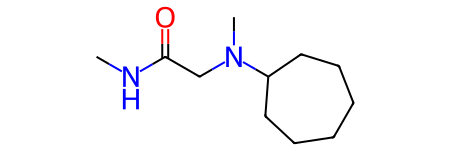

In [228]:
deck.lookup['CNC(=O)CN(C)C1CCCCCC1']

In [221]:
pdbqts[53]

'REMARK SMILES CNC(=O)CN(C)C1CCCCCC1\nREMARK SMILES IDX 8 1 6 2 7 3 5 4 3 5 1 6 2 7 4 9 9 10 10 11 11 12 14 14 13 15\nREMARK SMILES IDX 12 16\nREMARK H PARENT 2 8\nREMARK Flexibility Score: 90.00\nROOT\nATOM      1  C   UNL     1      -0.511   0.069   0.248  1.00  0.00     0.056 C \nENDROOT\nBRANCH   1   2\nATOM      2  N   UNL     1       0.745   0.515  -0.220  1.00  0.00    -0.295 NA\nATOM      3  C   UNL     1       0.816   1.720  -0.918  1.00  0.00     0.106 C \nBRANCH   2   4\nATOM      4  C   UNL     1       1.744  -0.457  -0.430  1.00  0.00     0.184 C \nBRANCH   4   5\nATOM      5  C   UNL     1       3.088  -0.034   0.095  1.00  0.00     0.233 C \nATOM      6  C   UNL     1       5.503  -0.560   0.444  1.00  0.00     0.142 C \nATOM      7  N   UNL     1       4.196  -0.926  -0.049  1.00  0.00    -0.358 N \nATOM      8  H   UNL     1       4.011  -1.839  -0.521  1.00  0.00     0.163 HD\nATOM      9  O   UNL     1       3.294   1.065   0.657  1.00  0.00    -0.274 OA\nENDBRANCH  

Create ligand txt summary file.

In [213]:
ligands_txt = ' '.join([os.path.join(out_dir, t) for t in os.listdir(out_dir)])
full_path = os.path.join(out_dir, 'ligands.txt')
with open(full_path, 'w') as file:
    file.write(ligands_txt)

In [188]:
# config = [
#     '--receptor',
# ]

In [214]:
import re

def extract_text_between_markers(text):

    # regex grabs top pose under affinity column in top row of each table
    pattern = r"mode\s+\|\s+affinity\s+\|\s+dist\s+from\s+best\s+mode[\s\S]+?-----+[\s\S]+?\d+\s+(-?\d+\.\d+)"

    # Use the updated regex pattern to find all matching numbers
    affinities = re.findall(pattern, text)

    return affinities

In [215]:
import subprocess

command = 'unidock --receptor ../../dgym-data/Mpro_prepped.pdbqt --ligand_index ../../dgym-data/out/ligands_temp/ligands.txt --center_x 9.812 --center_y -0.257 --center_z 20.8485 --size_x 14.328 --size_y 8.85 --size_z 12.539 --dir ../../dgym-data/out --exhaustiveness 128 --max_step 20 --num_modes 9 --scoring vina --refine_step 3 --seed 5'
resp = subprocess.run(
    command,
    shell=True, 
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE, 
    encoding='utf-8'
)
# print(resp.stdout)
# if resp.stderr:
#     print(resp.stderr)

In [216]:
import numpy as np

affinities = extract_text_between_markers(resp.stdout)
affinities = [float(d) for d in affinities]
np.argsort(affinities)[0]

37

In [217]:
affinities[37]

-40.94

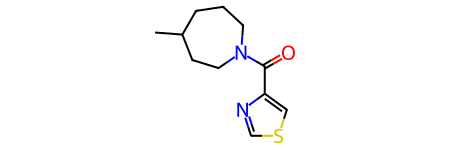

In [218]:
deck['CC1CCCN(C(=O)c2cscn2)CC1'][0]

In [180]:
print(resp.stdout)

Uni-Dock v0.1.0

If you used Uni-Dock in your work, please cite:               
 
Yu, Y., Cai, C., Wang, J., Bo, Z., Zhu, Z., & Zheng, H. (2023). 
Uni-Dock: GPU-Accelerated Docking Enables Ultralarge Virtual Screening. 
Journal of Chemical Theory and Computation.                    
https://doi.org/10.1021/acs.jctc.2c01145                       

Tang, S., Chen, R., Lin, M., Lin, Q., Zhu, Y., Ding, J., ... & Wu, J. (2022). 
Accelerating autodock vina with gpus. Molecules, 27(9), 3041. 
DOI 10.3390/molecules27093041                                 

J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  
AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      
Field, and Python Bindings, J. Chem. Inf. Model. (2021)       
DOI 10.1021/acs.jcim.1c00203                                  

O. Trott, A. J. Olson,                                        
AutoDock Vina: improving the speed and accuracy of docking    
with a new scoring function, efficient optimization and        
mu

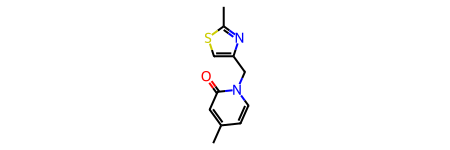

In [155]:
deck[29]